# readme
descrip: examples EOF codes to compute NAO index and ENSO 

update history: <br>
v1.0 DL 2021Apr04 <br>

extra notes: <br>

# NAO index
https://ajdawson.github.io/eofs/latest/examples/nao_xarray.html

In [1]:
import cartopy
cartopy.config['pre_existing_data_dir'] = '/scratch/group/ihesp/shared/cartopy_features/'

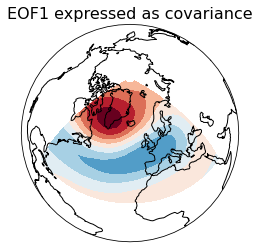

In [5]:
"""
Compute and plot the leading EOF of geopotential height on the 500 hPa
pressure surface over the European/Atlantic sector during winter time.

This example uses the metadata-retaining xarray interface.

Additional requirements for this example:

    * xarray (http://xarray.pydata.org)
    * matplotlib (http://matplotlib.org/)
    * cartopy (http://scitools.org.uk/cartopy/)

"""
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from eofs.xarray import Eof
from eofs.examples import example_data_path


# Read geopotential height data using the xarray module. The file contains
# December-February averages of geopotential height at 500 hPa for the
# European/Atlantic domain (80W-40E, 20-90N).
filename = example_data_path('hgt_djf.nc')
z_djf = xr.open_dataset(filename)['z']

# Compute anomalies by removing the time-mean.
z_djf = z_djf - z_djf.mean(dim='time')

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(z_djf.coords['latitude'].values)).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(z_djf, weights=wgts)

# Retrieve the leading EOF, expressed as the covariance between the leading PC
# time series and the input SLP anomalies at each grid point.
eof1 = solver.eofsAsCovariance(neofs=3)

# Plot the leading EOF expressed as covariance in the European/Atlantic domain.
clevs = np.linspace(-75, 75, 11)
proj = ccrs.Orthographic(central_longitude=-20, central_latitude=60)
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
eof1[0, 0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                         transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title('EOF1 expressed as covariance', fontsize=16)
plt.show()

In [3]:
xr.open_dataset(filename)

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/xarray/coding/times.py:113: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset>
Dimensions:           (bound: 2, latitude: 29, longitude: 49, pressure: 1, time: 65)
Coordinates:
  * time              (time) datetime64[ns] 1948-01-15T12:00:00 ... 2012-01-1...
  * pressure          (pressure) float32 500.0
  * latitude          (latitude) float32 20.0 22.5 25.0 27.5 ... 85.0 87.5 90.0
  * longitude         (longitude) float32 -80.0 -77.5 -75.0 ... 35.0 37.5 40.0
Dimensions without coordinates: bound
Data variables:
    bounds_time       (time, bound) datetime64[ns] ...
    bounds_latitude   (latitude, bound) float64 ...
    bounds_longitude  (longitude, bound) float64 ...
    z                 (time, pressure, latitude, longitude) float64 ...
Attributes:
    Conventions:  CF-1.0

Text(0.5, 1.0, 'EOF1 expressed as covariance')

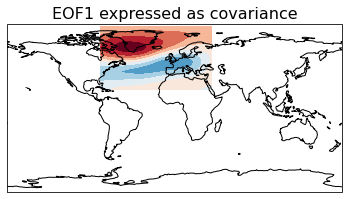

In [11]:
ax = plt.axes(projection= ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
eof1.isel(mode=0,pressure=0).plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                         transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title('EOF1 expressed as covariance', fontsize=16)

Text(0.5, 1.0, 'EOF1 expressed as covariance')

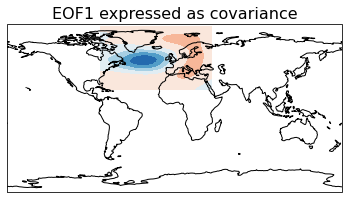

In [12]:
ax = plt.axes(projection= ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
eof1.isel(mode=1,pressure=0).plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                         transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title('EOF1 expressed as covariance', fontsize=16)

# ENSO
https://ajdawson.github.io/eofs/latest/examples/elnino_xarray.html

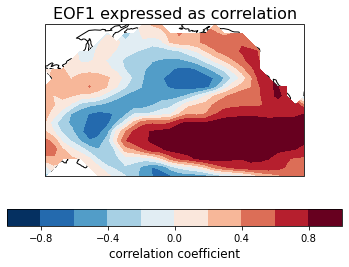

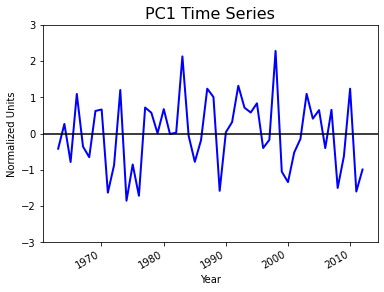

In [3]:
"""
Compute and plot the leading EOF of sea surface temperature in the
central and northern Pacific during winter time.

The spatial pattern of this EOF is the canonical El Nino pattern, and
the associated time series shows large peaks and troughs for well-known
El Nino and La Nina events.

This example uses the metadata-retaining xarray interface.

Additional requirements for this example:

    * xarray (http://xarray.pydata.org)
    * matplotlib (http://matplotlib.org/)
    * cartopy (http://scitools.org.uk/cartopy/)

"""
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from eofs.xarray import Eof
from eofs.examples import example_data_path


# Read SST anomalies using the xarray module. The file contains November-March
# averages of SST anomaly in the central and northern Pacific.
filename = example_data_path('sst_ndjfm_anom.nc')
sst = xr.open_dataset(filename)['sst']

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(sst.coords['latitude'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)

# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)

# Plot the leading PC time series.
plt.figure()
pc1[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()